# Lecture 10: Pandas DataFrames and Seaborn

## Quick Note about matplotlib

Text(0.5, 1.0, 'Small Markers: s = 2')

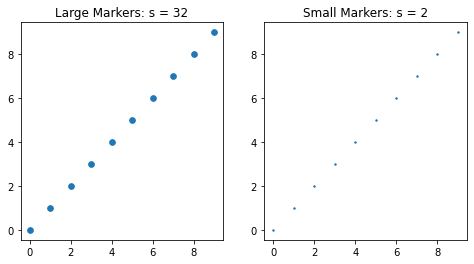

In [1]:
import matplotlib.pyplot as plt

x = y = range(10)

# we can control the size of the plot with plt.figure
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
# the "s" parameter will control the size of the markers on the plot
plt.scatter(x,y,s=32)
plt.title('Large Markers: s = 32')
plt.subplot(1,2,2)
plt.scatter(x,y,s=2)
plt.title('Small Markers: s = 2')

## Pandas

<div align="left"><img src=https://upload.wikimedia.org/wikipedia/commons/5/54/Chengdu-pandas-d10.jpg style="height:250px"></div>

- `pandas` is an incredibly powerful module for data analysis.
- `pandas` stores one dimensional iterables of objects in a class called `Series`
- `DataFrames` are tables where the columns of the table are made up of `Series` objects

## `pandas.Series`
- We can initialize an instance of the `Series` class
    - The input can be an iterable like a list or tuple or a 1D `numpy` array
    - The input can also be a `dict`

In [2]:
import pandas as pd

s = pd.Series([100, 'hello', 13.4, 'goodbye', 45.903])
print(s)

0        100
1      hello
2       13.4
3    goodbye
4     45.903
dtype: object


- `Series` objects have an index that can be used to index and slice the `Series`
    - The index can be any numeric or string values, but each value in the index must be unique
- `Series` can contain any type of object
    - If a `Series` contains mixed types it's dtype is object
    - You can view the type of data contained in a `Series` with the `dtype` attribute

In [3]:
# s has mixed types so it's dtype will be object
s.dtype

dtype('O')

In [4]:
class MyClass(object):
    pass

# Series can contain any kind of object, but pandas is most useful for numbers, strings, and dates
s = pd.Series([1000, 'hello', MyClass(), MyClass()])
print(s)

0                                               1000
1                                              hello
2    <__main__.MyClass object at 0x000001B7BFE47220>
3    <__main__.MyClass object at 0x000001B7C05E84F0>
dtype: object


- You can try to force the objects in a `Series` into a certain dtype with the `astype` method

In [5]:
s = pd.Series([1, 345, 12.78])
print(s)
# force the series to convert the values to str
s = s.astype(str)
print(s)

0      1.00
1    345.00
2     12.78
dtype: float64
0      1.0
1    345.0
2    12.78
dtype: object


- Note how the `dtype` changed from `float64` to `object`
- If a `Series` contains only `str` objects then its `dtype` will be `object`

### pandas `Series` use `numpy` arrays to store data
- `Series` objects have a `values` attribute that returns the values as a 1D `numpy` array

In [6]:
s = pd.Series(range(5,0,-1))
print(s)
s.values

0    5
1    4
2    3
3    2
4    1
dtype: int64


array([5, 4, 3, 2, 1], dtype=int64)

In [7]:
type(s.values)

numpy.ndarray

### `Series` index
- `Series` objects have an attribute called `index`. The index is similar to the keys of a dictionary
    - pandas has a special class called `index` to store the values of the index
- The index is an iterable that can be numbers, strings, or dates
- You can specify the index values in the call to `pandas.Series()`
- If you give a dictionary as input to `pandas.Series()`, the keys will be the index and the values of the `dict` will be the values of the `Series`

In [8]:
s = pd.Series([14,28,32,12.5],index=["A","B","C","D"])
print(s)

A    14.0
B    28.0
C    32.0
D    12.5
dtype: float64


In [9]:
s.index

Index(['A', 'B', 'C', 'D'], dtype='object')

In [10]:
# initializing a series with a dict
mathematicians = {
    "A":"Joseph Fourier",
    "B":"Emmy Noether",
    "C":"Ada Lovelace",
    "D":"Thomas Bayes"
}
s = pd.Series(mathematicians)
print(s)

A    Joseph Fourier
B      Emmy Noether
C      Ada Lovelace
D      Thomas Bayes
dtype: object


In [11]:
print(s.index)
print(s.values)

Index(['A', 'B', 'C', 'D'], dtype='object')
['Joseph Fourier' 'Emmy Noether' 'Ada Lovelace' 'Thomas Bayes']


## Pandas DataFrame
- `pandas` has a class called `DataFrame` for storing and operating on tables of values
- Each column of a `DataFrame` is a `Series` and each row of a `DataFrame` is also a `Series`
- You can initialize a `DataFrame` by calling `pandas.DataFrame()`
- `pandas.DataFrame()` can be initialized with:
    - A list of lists, each sublist will be a row of the DataFrame
    - A dictionary with iterables as values 
        - Each key will be the name of a column
        - The values of the dictionary will become the values of the column
    - An `iterable` of `Series` objects
        - `Series` objects are also iterable 
    - A `numpy.ndarray` object
- In jupyterlab you can use `display` instead of `print` and it will show the DataFrame with nice formatting

In [12]:
# make a dataframe with a lists of lists
df = pd.DataFrame(
    [
        ['A','B','C','D','E'],
        [10,100,1000,10000,100000],
        ['Z','Y','X','W','V']
    ]
)
display(df)

,0,1,2,3,4
0,A,B,C,D,E
1,10,100,1000,10000,100000
2,Z,Y,X,W,V


In [13]:
# printing the DataFrame
print(df)

    0    1     2      3       4
0   A    B     C      D       E
1  10  100  1000  10000  100000
2   Z    Y     X      W       V


In [14]:
# if you use display instead of print jupyter will format your dataframe into a table
display(df)

,0,1,2,3,4
0,A,B,C,D,E
1,10,100,1000,10000,100000
2,Z,Y,X,W,V


In [15]:
# just like numpy dataframes have a shape attribute
df.shape

(3, 5)

In [16]:
# initialize a DataFrame with a list of series
df = pd.DataFrame(
    [
        pd.Series(['A','B','C','D','E']),
        pd.Series([10,100,1000,10000,100000]),
        pd.Series(['Z','Y','X','W','V'])
    ]
)
display(df)

,0,1,2,3,4
0,A,B,C,D,E
1,10,100,1000,10000,100000
2,Z,Y,X,W,V


In [19]:
# make a dataframe with a dictionary
df = pd.DataFrame(
    {
        "A": [1e0, 1e2, 1e3, 1e4, 1e5],
        "B": ["Joe Simon", "Jack Kirby", "Marie Severin", "Don Heck", "Steve Ditko"]
    }
)
display(df)

,A,B
0,1.0,Joe Simon
1,100.0,Jack Kirby
2,1000.0,Marie Severin
3,10000.0,Don Heck
4,100000.0,Steve Ditko


In [20]:
import numpy as np

# initialize a dataframe with a numpy array
a = np.ones((4,5))
df = pd.DataFrame(a)
display(df)

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0


### Specifying rows and columns in a DataFrame
- `pandas.DataFrame` will take `columns` and `index` as input variables

In [21]:
# specify index and column values
df = pd.DataFrame(
    [
        [12, 67],
        [3.14, 2.71],
        [6, 103]
    ],
    columns = ["A","B"],
    index = ["X","Y","Z"]
)
display(df)

,A,B
X,12.00,67.00
Y,3.14,2.71
Z,6.00,103.00


### `DataFrame` `index` and `columns`
- `pandas` DataFrames have `index` and `columns` attributes that store objects of the `index` class containing the index and column values respectively
- You can reassign the `columns` and `index` attributes using iterables with the same number of elements as the original `columns` or `index` attribute

In [22]:
df.columns

Index(['A', 'B'], dtype='object')

In [23]:
df.index

Index(['X', 'Y', 'Z'], dtype='object')

In [24]:
# reassign the index
df.index = [0, 1, 2]
display(df)

,A,B
0,12.00,67.00
1,3.14,2.71
2,6.00,103.00


In [25]:
# reassign the columns
df.columns = [0, 1]
display(df)

,0,1
0,12.00,67.00
1,3.14,2.71
2,6.00,103.00


### DataFrames also have a `values` attribute
- `values` is a `numpy.ndarray` object

In [26]:
df.values

array([[ 12.  ,  67.  ],
       [  3.14,   2.71],
       [  6.  , 103.  ]])

In [27]:
type(df.values)

numpy.ndarray

### `DataFrame.reset_index()`
- Whatever the index of a dataframe is, you can set 0:(number of rows -1) as the index with the `reset_index()` function
- By default it will make the original index into a column of the new dataframe
    - unless you specify `drop = True`

In [28]:
df = pd.DataFrame([range(4),range(4),range(4)],index=['A','B','C'])
display(df)

,0,1,2,3
A,0,1,2,3
B,0,1,2,3
C,0,1,2,3


In [29]:
df.reset_index()

,index,0,1,2,3
0,A,0,1,2,3
1,B,0,1,2,3
2,C,0,1,2,3


In [30]:
df.reset_index(drop=True)

,0,1,2,3
0,0,1,2,3
1,0,1,2,3
2,0,1,2,3


### Reading a `DataFrame` from a file
- `pandas` has many functions to read data from files
- We will look at 3 of them
     1. `pandas.read_csv()` - read data from a CSV file: comma-delimited file
     2. `pandas.read_table()` - read data from a tab-delimited file
     3. `pandas.read_excel()` - read data from an Excel file
- `pandas.read_csv()` and `pandas.read_table()` are the same function.
    - You can use `pandas.read_csv()` to read a tab-delimited text file

### `pandas.read_csv()`
- The main function for reading delimited text files.
- Refer to the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- Input variables
    - `file_path_or_buffer`: file name
    - `sep`: delimiter (comma by default, but you can use any value including "\\t")
    - `delimiter`: same as `sep`
    - `header`: zero-based index of the header of the file (will be the `columns` attribute of the DataFrame)
        - `0` by default
        - use `None` if there is no header
        - You can use a list of ints if you want to use multiindexing for the `columns`, but we are not going to cover multiindexing
    - `index_col`: zero-based index of the column in the file to use as the DataFrame's index
        - `None` by default
        - Can also be multiindexed
    - `skiprows`: list of ints telling `pandas` which rows in the file to ignore
    - `usecols`: indices or names of columns to put in the dataframe and exclude the remaining columns
    - And many more. Refer to the documentation

In [31]:
# read a csv file
df = pd.read_csv('penguins.csv')
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [32]:
# read a tab-delimited text file
df = pd.read_csv('cars.txt',sep='\t')
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [33]:
# we can also use pd.read_table()
df = pd.read_table('cars.txt')
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### `pandas.read_excel()`
- `pandas.read_excel()` is similar to the `read_csv()` function
    - no `sep` because Excel files don't have delimiters
- However, it has an extra input `sheet_name`
    - This is name of the worksheet to read, if it is not provided by default pandas will read the first worksheet

In [34]:
# read an excel file
df = pd.read_excel('cars.xlsx')
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### Writing `pandas.DataFrame` objects to text and CSV files
- `pandas.DataFrame` objects have methods for writing files
- `DataFrame.to_csv()` is for writing delimited text files
    - `path_or_buf`: file name
    - `sep`: delimiter usually "," or "\\t"
    - `index`: should the index be included in the file:`True` or `False`
    - `header`: should the columns be included in the file:`True` or `False`
- There are many more input variable options. Refer to the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)    

In [35]:
# write a text file
df = pd.read_csv('cars.txt',sep='\t')
# get the first few rows of the dataframe
df = df.head()
# write the file
df.to_csv('beginning_of_cars.txt',sep='\t',index=False)

In [36]:
# check the dataframe
df = pd.read_table('beginning_of_cars.txt')
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Writing DataFrames to Excel files
- `pandas.DataFrame` objects have `to_excel()` method for writing excel file
- This is similar to `DataFrame.to_csv()` except Excel files do not have delimiters
    - Similar arguments
- Some input variables unique to `DataFrame.to_excel()`
    - `excel_writer`: file name or `pandas.ExcelWriter` object
    - `sheet_name`: name of worksheet to save the dataframe to
    - `na_rep`: character for missing values
- Refer to the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html) for more information

In [37]:
# write an excel file

# read in a dataframe
df = pd.read_excel('cars.xlsx')
# get first few rows
df = df.head()
# write the excel file
df.to_excel('beginning_of_cars.xlsx')

### Writing multiple worksheets to the same Excel file

In [38]:
df = pd.read_csv('penguins.csv')

# use pd.ExcelWriter in a with statement just like opening files
with pd.ExcelWriter('parts_of_penguins.xlsx') as writer:
    df.head().to_excel(writer,sheet_name='beginning')
    df.tail().to_excel(writer,sheet_name='end')

## Indexing and Slicing `pandas.DataFrame` and `pandas.Series` objects
- Unlike lists, the elements stored in  pandas series objects are accessed using the index class
    - In this way they are more similar to dictionaries than lists
- DataFrame values are accessed using their index and column values
- `pandas.Series` and `pandas.DataFrame` are indexed with `.loc` and `.iloc`
    - `.loc` uses the index object values
    - `.iloc` uses regular numeric zero-based indexing
        - e.g. the first element of `s` is `s.iloc[0]`

In [39]:
### Indexing series
s = pd.Series([10, 3, 100], index=["A","B","C"])
print(s)

A     10
B      3
C    100
dtype: int64


In [40]:
# get the first element of s
s.iloc[0]

10

In [41]:
# get the first element of s AKA the element where the index == "A"
s.loc["A"]

10

### Series indexing
- `iloc` and `loc` can be confusing
- if the index values of a series are integers (including 0) then `s.loc[0]` and `s.iloc[0]` are equivalent
- `loc` - uses the actual index value
- `iloc` is the number of the element starting at 0

In [42]:
# if the indices are integers beginning at 0 then iloc and and loc are the same
s = pd.Series(["a","b","c","d"])
print(s)
print(s.iloc[0])
print(s.loc[0])

0    a
1    b
2    c
3    d
dtype: object
a
a


### `iloc` indexing is just like indexing `numpy.ndarray` objects
- The standard python indexing rules apply

In [43]:
s = pd.Series(["a","b","c","d"])
# get the first 2 elements
s.iloc[:2]

0    a
1    b
dtype: object

In [44]:
# get the last element
s.iloc[-1]

'd'

In [45]:
# you can also slice an index with strings as its values
s = pd.Series({'a':'noodles','b':'pizza','c':'burger', 'd':'burrito'})
print(s)
# get values from a to c
s.loc['a':'c']
# notice that 'c' is included in the slice

a    noodles
b      pizza
c     burger
d    burrito
dtype: object


a    noodles
b      pizza
c     burger
dtype: object

### Indexing DataFrames
- DataFrames also use `loc` and `iloc`
- For DataFrames `loc` and `iloc` are similar to `numpy.ndarray` indexing
- You can get a column from a dataframe using brackets
    - A column of a `DataFrame` is a `Series`

In [46]:
# make a dataframe with 10 rows
df = pd.read_csv('penguins.csv').sample(10,random_state=0)
df.index = list('ABCDEFGHIJ')
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
A,Adelie,Dream,40.6,17.2,187.0,3475.0,Male
B,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
C,Adelie,Biscoe,35.7,16.9,185.0,3150.0,Female
D,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male
E,Adelie,Biscoe,34.5,18.1,187.0,2900.0,Female
F,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,Female
G,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female
H,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
I,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female
J,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female


In [47]:
# get the column
df['species']

A       Adelie
B       Adelie
C       Adelie
D       Gentoo
E       Adelie
F       Gentoo
G       Adelie
H    Chinstrap
I       Gentoo
J       Adelie
Name: species, dtype: object

In [48]:
# columns of dataframes are series objects
type(df['species'])

pandas.core.series.Series

In [49]:
type(df)

pandas.core.frame.DataFrame

In [50]:
# use a list to get multiple columns
df[['species','island','sex']]

,species,island,sex
A,Adelie,Dream,Male
B,Adelie,Torgersen,Female
C,Adelie,Biscoe,Female
D,Gentoo,Biscoe,Male
E,Adelie,Biscoe,Female
F,Gentoo,Biscoe,Female
G,Adelie,Torgersen,Female
H,Chinstrap,Dream,Male
I,Gentoo,Biscoe,Female
J,Adelie,Biscoe,Female


### Using `loc` and `iloc` with DataFrames
- `loc` and `iloc` work similarly in DataFrames as they do in Series
- `iloc` is numbered starting at 0
- `loc` is the actual values stored in the `index` and `columns` attributes
- In DataFramees `loc` and `iloc` can take up to 2 values to specify row and column coordinates just like a `numpy.ndarray`

In [51]:
# get 4th row 
df.iloc[3]

species              Gentoo
island               Biscoe
bill_length_mm         50.0
bill_depth_mm          15.3
flipper_length_mm     220.0
body_mass_g          5550.0
sex                    Male
Name: D, dtype: object

In [52]:
# get 4th row and 5th column value
df.iloc[3,4]

220.0

In [53]:
# get first 2 rows
df.iloc[:2]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
A,Adelie,Dream,40.6,17.2,187.0,3475.0,Male
B,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female


In [54]:
# get last 2 columns
df.iloc[:,-2:]

,body_mass_g,sex
A,3475.0,Male
B,3625.0,Female
C,3150.0,Female
D,5550.0,Male
E,2900.0,Female
F,4750.0,Female
G,3275.0,Female
H,4000.0,Male
I,5050.0,Female
J,3725.0,Female


In [55]:
df.iloc[3:5,2:5]

,bill_length_mm,bill_depth_mm,flipper_length_mm
D,50.0,15.3,220.0
E,34.5,18.1,187.0


In [56]:
# get row D using loc
df.loc["D"]

species              Gentoo
island               Biscoe
bill_length_mm         50.0
bill_depth_mm          15.3
flipper_length_mm     220.0
body_mass_g          5550.0
sex                    Male
Name: D, dtype: object

In [57]:
# get rows and columns using lists of values
df.loc[["C","F"], ["island","sex"]]

,island,sex
C,Biscoe,Female
F,Biscoe,Female


In [58]:
# get a range of columns
df.loc[:,"bill_length_mm":"flipper_length_mm"]

,bill_length_mm,bill_depth_mm,flipper_length_mm
A,40.6,17.2,187.0
B,38.9,17.8,181.0
C,35.7,16.9,185.0
D,50.0,15.3,220.0
E,34.5,18.1,187.0
F,45.5,14.5,212.0
G,38.8,17.6,191.0
H,55.8,19.8,207.0
I,45.1,14.5,207.0
J,35.0,17.9,192.0


### Reassigning values
- Just like `numpy.ndarray` objects you can reassign values using indexing
- You can also add new rows and columns to existing DataFrames

In [65]:
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
A,Adelie,Dream,40.6,17.2,187.0,3475.0,Male
B,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
C,Adelie,Biscoe,35.7,16.9,185.0,3150.0,Female
D,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male
E,Adelie,Biscoe,34.5,18.1,187.0,2900.0,Female
F,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,Female
G,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female
H,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
I,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female
J,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female


In [66]:
df.loc["E","bill_length_mm"] = 100000
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
A,Adelie,Dream,40.6,17.2,187.0,3475.0,Male
B,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
C,Adelie,Biscoe,35.7,16.9,185.0,3150.0,Female
D,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male
E,Adelie,Biscoe,100000.0,18.1,187.0,2900.0,Female
F,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,Female
G,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female
H,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
I,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female
J,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female


In [67]:
# Add a new column
df['kg'] = df['body_mass_g']/1000
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kg
A,Adelie,Dream,40.6,17.2,187.0,3475.0,Male,3.475
B,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,3.625
C,Adelie,Biscoe,35.7,16.9,185.0,3150.0,Female,3.150
D,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male,5.550
E,Adelie,Biscoe,100000.0,18.1,187.0,2900.0,Female,2.900
F,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,Female,4.750
G,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female,3.275
H,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male,4.000
I,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female,5.050
J,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female,3.725


In [68]:
# if you try to assign a single value it will make the entire column have that value
df['kg'] = 'kilograms'
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kg
A,Adelie,Dream,40.6,17.2,187.0,3475.0,Male,kilograms
B,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,kilograms
C,Adelie,Biscoe,35.7,16.9,185.0,3150.0,Female,kilograms
D,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male,kilograms
E,Adelie,Biscoe,100000.0,18.1,187.0,2900.0,Female,kilograms
F,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,Female,kilograms
G,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female,kilograms
H,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male,kilograms
I,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female,kilograms
J,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female,kilograms


In [70]:
df['new_col'] = np.arange(df.shape[0])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kg,new_col
A,Adelie,Dream,40.6,17.2,187.0,3475.0,Male,kilograms,0
B,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,kilograms,1
C,Adelie,Biscoe,35.7,16.9,185.0,3150.0,Female,kilograms,2
D,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male,kilograms,3
E,Adelie,Biscoe,100000.0,18.1,187.0,2900.0,Female,kilograms,4
F,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,Female,kilograms,5
G,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female,kilograms,6
H,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male,kilograms,7
I,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female,kilograms,8
J,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female,kilograms,9


### Copying DataFrames
- If you want to create a new variable that does not point to the original DataFrame you can use the `DataFrame.copy()` method

In [71]:
# assign the dataframe to a variable
df2 = df
display(df2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kg,new_col
A,Adelie,Dream,40.6,17.2,187.0,3475.0,Male,kilograms,0
B,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,kilograms,1
C,Adelie,Biscoe,35.7,16.9,185.0,3150.0,Female,kilograms,2
D,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male,kilograms,3
E,Adelie,Biscoe,100000.0,18.1,187.0,2900.0,Female,kilograms,4
F,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,Female,kilograms,5
G,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female,kilograms,6
H,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male,kilograms,7
I,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female,kilograms,8
J,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female,kilograms,9


In [72]:
# df and df2 are the same object
df is df2

True

In [73]:
# reassign values in df2
df2.loc['A':'B',"island"] = ['Hawaii','Japan']
display(df2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kg,new_col
A,Adelie,Hawaii,40.6,17.2,187.0,3475.0,Male,kilograms,0
B,Adelie,Japan,38.9,17.8,181.0,3625.0,Female,kilograms,1
C,Adelie,Biscoe,35.7,16.9,185.0,3150.0,Female,kilograms,2
D,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male,kilograms,3
E,Adelie,Biscoe,100000.0,18.1,187.0,2900.0,Female,kilograms,4
F,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,Female,kilograms,5
G,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female,kilograms,6
H,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male,kilograms,7
I,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female,kilograms,8
J,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female,kilograms,9


In [74]:
# changing df2 also changed df
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kg,new_col
A,Adelie,Hawaii,40.6,17.2,187.0,3475.0,Male,kilograms,0
B,Adelie,Japan,38.9,17.8,181.0,3625.0,Female,kilograms,1
C,Adelie,Biscoe,35.7,16.9,185.0,3150.0,Female,kilograms,2
D,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male,kilograms,3
E,Adelie,Biscoe,100000.0,18.1,187.0,2900.0,Female,kilograms,4
F,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,Female,kilograms,5
G,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female,kilograms,6
H,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male,kilograms,7
I,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female,kilograms,8
J,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female,kilograms,9


In [75]:
# you can make copies of dataframes
df_copy = df.copy()
df_copy is df

False

In [76]:
# reassign values in df_copy
df_copy["species"] = "Bird"
display(df_copy)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kg,new_col
A,Bird,Hawaii,40.6,17.2,187.0,3475.0,Male,kilograms,0
B,Bird,Japan,38.9,17.8,181.0,3625.0,Female,kilograms,1
C,Bird,Biscoe,35.7,16.9,185.0,3150.0,Female,kilograms,2
D,Bird,Biscoe,50.0,15.3,220.0,5550.0,Male,kilograms,3
E,Bird,Biscoe,100000.0,18.1,187.0,2900.0,Female,kilograms,4
F,Bird,Biscoe,45.5,14.5,212.0,4750.0,Female,kilograms,5
G,Bird,Torgersen,38.8,17.6,191.0,3275.0,Female,kilograms,6
H,Bird,Dream,55.8,19.8,207.0,4000.0,Male,kilograms,7
I,Bird,Biscoe,45.1,14.5,207.0,5050.0,Female,kilograms,8
J,Bird,Biscoe,35.0,17.9,192.0,3725.0,Female,kilograms,9


In [77]:
# the original dataframe is not altered
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kg,new_col
A,Adelie,Hawaii,40.6,17.2,187.0,3475.0,Male,kilograms,0
B,Adelie,Japan,38.9,17.8,181.0,3625.0,Female,kilograms,1
C,Adelie,Biscoe,35.7,16.9,185.0,3150.0,Female,kilograms,2
D,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male,kilograms,3
E,Adelie,Biscoe,100000.0,18.1,187.0,2900.0,Female,kilograms,4
F,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,Female,kilograms,5
G,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female,kilograms,6
H,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male,kilograms,7
I,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female,kilograms,8
J,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female,kilograms,9


### Indexing Series and DataFrames with Boolean values 
- Just like `numpy.ndarray` objects you can also use boolean arrays with `pandas.Series` and `pandas.DataFrame` objects

In [78]:
df = pd.read_csv('penguins.csv').sample(10,random_state=0)
df.index = list('ABCDEFGHIJ')

# get rows with heavy birds
df.loc[df["body_mass_g"] > 4000]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
D,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male
F,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,Female
I,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female


In [79]:
# comparison operators return a Series of boolean values
df["body_mass_g"] > 4000

A    False
B    False
C    False
D     True
E    False
F     True
G    False
H    False
I     True
J    False
Name: body_mass_g, dtype: bool

In [80]:
# you have to use elementwise boolean operators & instead of and etc.
cond = (df['flipper_length_mm'] > 200) & (df['sex'] == 'Male')
tall_bois = df.loc[cond]
display(tall_bois)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
D,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male
H,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male


In [81]:
# cond is a series with boolean values
print(cond)

A    False
B    False
C    False
D     True
E    False
F    False
G    False
H     True
I    False
J    False
dtype: bool


In [82]:
# get the index values where cond is True
cond.index[cond]

Index(['D', 'H'], dtype='object')

In [83]:
# get species of  heavy birds
df.loc[df["body_mass_g"] > 4000, 'species']

D    Gentoo
F    Gentoo
I    Gentoo
Name: species, dtype: object

In [85]:
df.loc[df["body_mass_g"] > 4000, df.columns == 'sex']

,sex
D,Male
F,Female
I,Female


In [88]:
df['body_mass_g'] > 4000

A    False
B    False
C    False
D     True
E    False
F     True
G    False
H    False
I     True
J    False
Name: body_mass_g, dtype: bool

In [86]:
arb = pd.DataFrame(np.ones((3,3)))
arb

,0,1,2
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0


## Data Analysis with Pandas

### Math Operations
- Like `numpy.ndarray` objects `pandas.Series` and `pandas.DataFrame` objects many methods

#### `pandas.Series` methods
- `min()`
- `max()`
- `mean()`
- `median()`
- `std()`
- `sum()`
- `any()`
- `all()`
- `describe()`: summary statistics
- `value_counts()`: for a categorical variable count how many occurrence of each value
- `quantile()`: percentile value
- `isna()`: is the value a missing value AKA np.nan
- `notna()`: opposite of `.isna()`
- `replace`: replace values with a dictionary

In [89]:
df = pd.read_csv('penguins.csv')
df['body_mass_g'].min()

2700.0

In [90]:
df['flipper_length_mm'].median()

197.0

In [91]:
df['body_mass_g'].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [92]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [93]:
# missing values can be represented with numpy.nan
df['body_mass_g'].isna()

0      False
1      False
2      False
3       True
4      False
       ...  
339     True
340    False
341    False
342    False
343    False
Name: body_mass_g, Length: 344, dtype: bool

In [94]:
# are there any missing values
df['body_mass_g'].isna().any()

True

In [95]:
# Series.replace example
df2 = df.copy()
df2['species'] = df2['species'].replace({'Gentoo':"Pingoo"})
print(df['species'])
df2['species']

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object


0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Pingoo
340    Pingoo
341    Pingoo
342    Pingoo
343    Pingoo
Name: species, Length: 344, dtype: object

### `Series.apply()`
- `apply()` is similar to `map` in pure Python
- `apply()` maps a function to each value in a series

In [96]:
df['body_mass_g'].apply(lambda x: x/1000)

0      3.75
1      3.80
2      3.25
3       NaN
4      3.45
       ... 
339     NaN
340    4.85
341    5.75
342    5.20
343    5.40
Name: body_mass_g, Length: 344, dtype: float64

### `pandas.Series.str` methods
- Series objects have many methods for operation on strings
- All standard python `str` methods are available
    -`str.upper()`
    - `str.lower()`
    - `str.strip()`
    - etc.
- `str.extract()`: using a regular expression with a capture group return matches
- `str.replace()`: like regular `str` `replace` except it can accept regular expressions
- `str.contains()`: returns boolean `Series` where the string contains a substring, can accept regular expressions

In [97]:
df['species'].str.upper()

0      ADELIE
1      ADELIE
2      ADELIE
3      ADELIE
4      ADELIE
        ...  
339    GENTOO
340    GENTOO
341    GENTOO
342    GENTOO
343    GENTOO
Name: species, Length: 344, dtype: object

In [98]:
# str.extract example
df['sex'].str.extract('(M|F)')

,0
0,M
1,F
2,F
3,NaN
4,F
...,...
339,NaN
340,F
341,M
342,F


In [99]:
cars = pd.read_table('cars.txt')
display(cars)
# str.contains example
cars['name'].str.contains('buick')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


0      False
1       True
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: name, Length: 398, dtype: bool

### Math operations
- Just like `numpy.ndarray` objects `Series` can do math operations like addition etc.

In [100]:
df['body_mass_g']/1000

0      3.75
1      3.80
2      3.25
3       NaN
4      3.45
       ... 
339     NaN
340    4.85
341    5.75
342    5.20
343    5.40
Name: body_mass_g, Length: 344, dtype: float64

### You can chain methods together

In [101]:
# how many toyotas
cars['name'].str.contains('toyota').sum()

25

## `DataFrame` methods
- DataFrames have some of the same methods as Series
    - These methods will be applied column-wise by default, but can be applied row-wise
- `sum()`
- `mean()`
- `median()`
- `describe()`
- You will get an error if you try to use these methods on a dataframe that has non-numeric columns

In [102]:
import numpy as np
# get only numeric columns
car_stats = cars.select_dtypes(np.number)
display(car_stats)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [103]:
# calling the sum method applies it to every column
car_stats.sum()

mpg                9358.8
cylinders          2171.0
displacement      76983.5
horsepower        40952.0
weight          1182229.0
acceleration       6196.1
model_year        30252.0
dtype: float64

In [104]:
car_stats.mean()

mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.469388
weight          2970.424623
acceleration      15.568090
model_year        76.010050
dtype: float64

In [105]:
# use the axis argument to apply over rows
# similar to numpy
car_stats.mean(axis=1)

0      578.428571
1      616.071429
2      573.000000
3      570.428571
4      570.928571
          ...    
393    449.228571
394    347.657143
395    377.657143
396    422.371429
397    436.771429
Length: 398, dtype: float64

In [106]:
# get min of every column
car_stats.min(axis=0)

mpg                9.0
cylinders          3.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
model_year        70.0
dtype: float64

In [107]:
# describe is now applied to every column
car_stats.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### `DataFrame.apply()` and `DataFrame.applymap()`
- `apply()` is similar to `Series.apply()` except that it can act on either rows or columns depending on the `axis` argument
- `applymap()` applies a function to every value in the dataframe

In [ ]:
# calculate the standard error of each column
stderr = lambda x: x.std()/x.shape[0]
car_stats.apply(stderr)

In [ ]:
# standard error of each row
car_stats.apply(stderr,axis=1)

In [ ]:
# apply square root function to every value in the dataframe
import numpy as np
car_stats.applymap(np.sqrt)

In [ ]:
# a simpler way
np.sqrt(car_stats)

## Combining DataFrames
- DataFrames can be combined with different functions
- `DataFrame.append()`: append rows to a dataframe
- `pandas.concat()`: concatenate lists of dataframes
- `pandas.merge()`: combine 2 dataframes matching rows based on values or the index
- `Dataframe.join()`: similar to `pandas.merge()`

## Reshaping DataFrames
- `DataFrame.transpose()`: transpose the dataframe
- `DataFrame.melt()`: convert to "long" format
- `DataFrame.pivot()`: pivot the data frame based on column values
- `DataFrame.pivot_table()`: will pivot and aggregate duplicated values

In [108]:
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [109]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
species,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,...,Gentoo,Gentoo,Gentoo,Gentoo,Gentoo,Gentoo,Gentoo,Gentoo,Gentoo,Gentoo
island,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,...,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe
bill_length_mm,39.1,39.5,40.3,NaN,36.7,39.3,38.9,39.2,34.1,42.0,...,46.2,55.1,44.5,48.8,47.2,NaN,46.8,50.4,45.2,49.9
bill_depth_mm,18.7,17.4,18.0,NaN,19.3,20.6,17.8,19.6,18.1,20.2,...,14.1,16.0,15.7,16.2,13.7,NaN,14.3,15.7,14.8,16.1
flipper_length_mm,181.0,186.0,195.0,NaN,193.0,190.0,181.0,195.0,193.0,190.0,...,217.0,230.0,217.0,222.0,214.0,NaN,215.0,222.0,212.0,213.0
body_mass_g,3750.0,3800.0,3250.0,NaN,3450.0,3650.0,3625.0,4675.0,3475.0,4250.0,...,4375.0,5850.0,4875.0,6000.0,4925.0,NaN,4850.0,5750.0,5200.0,5400.0
sex,Male,Female,Female,NaN,Female,Male,Female,Male,NaN,NaN,...,Female,Male,NaN,Male,Female,NaN,Female,Male,Female,Male


In [ ]:
# convert the dataframe to "long" format
melted_df = df.reset_index().melt(id_vars='index')
display(melted_df)

In [ ]:
# we have now recovered the original dataframe, though the columns are sorted
melted_df.pivot(index='index',columns="variable",values='value')

In [ ]:
# use pivot_table to get the average weight of each species by sex
mass = df.pivot_table(index=['species','sex'],values = 'body_mass_g',aggfunc='mean')
display(mass)

In [ ]:
mass = mass.reset_index()
# get a table of body mass with female and male as columns and species as rows
mass.pivot(index='species',columns='sex',values='body_mass_g')

### `DataFrame.groupby()`
- You can group a dataframe based on the values of one or more columns
- returns a grouped dataframe object

In [110]:
# longest flippers per species
df.groupby('species')['flipper_length_mm'].max()

species
Adelie       210.0
Chinstrap    212.0
Gentoo       231.0
Name: flipper_length_mm, dtype: float64

In [111]:
df.groupby(['species','sex'])['body_mass_g'].mean()

species    sex   
Adelie     Female    3368.835616
           Male      4043.493151
Chinstrap  Female    3527.205882
           Male      3938.970588
Gentoo     Female    4679.741379
           Male      5484.836066
Name: body_mass_g, dtype: float64

## Plotting with Pandas
- Pandas has its own plotting interface that is built on top of matplotlib
- `Series.plot()`: takes x value
- `DataFrame.plot()`: takes column names for x and y values
- `kind` argument takes what kind of plot e.g (scatter, bar, line, hist, etc)

<AxesSubplot:title={'center':'Histogram of Body Mass'}, ylabel='Frequency'>

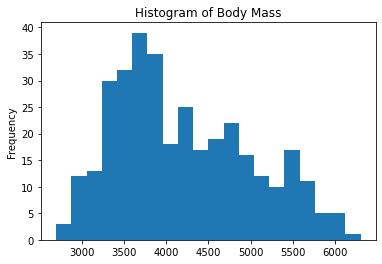

In [112]:
df['body_mass_g'].plot(kind='hist',bins=20, title = "Histogram of Body Mass")

<AxesSubplot:title={'center':'Average Value of Measure'}>

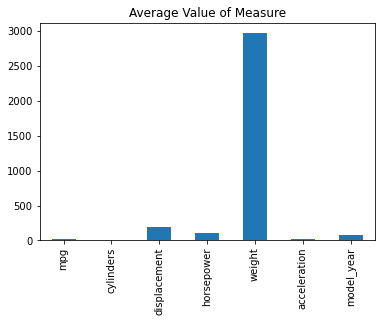

In [113]:
car_stats.mean().plot(kind='bar', title = "Average Value of Measure")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

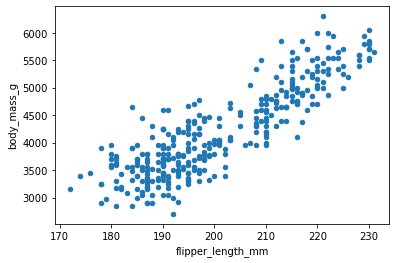

In [114]:
df.plot(x='flipper_length_mm',y='body_mass_g',kind='scatter')

## Data Visualization with `seaborn`
- `seaborn` is an extremely convenient plotting library built on top of `matplotlib`
- `pandas` plots and `seaborn` plots are `matplotlib` plots and you can use `matplotlib` functions on them
- `matplotlib` plots take the data values as inputs, but `seaborn` takes `DataFrames` as inputs
- You often need to write a lot of code to get the plot you desire using `matplotlib`, but `seaborn` has a high-level, easy-to-use interface for generating complex plots.
- Refer to the [documentation](https://seaborn.pydata.org/index.html)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

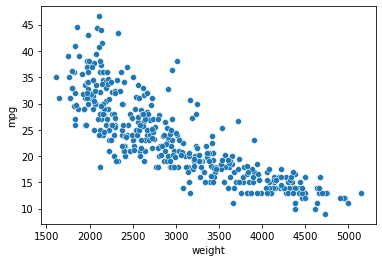

In [115]:
import seaborn as sns

cars = pd.read_table('cars.txt')
sns.scatterplot(data=cars,x='weight',y='mpg')

## Plotting themes 
- `seaborn` has several themes you can use to change how your plot looks
    - notebook
    - talk
    - poster
    - paper
- Use `seaborn.set_theme()` to change the theme

<AxesSubplot:xlabel='weight', ylabel='mpg'>

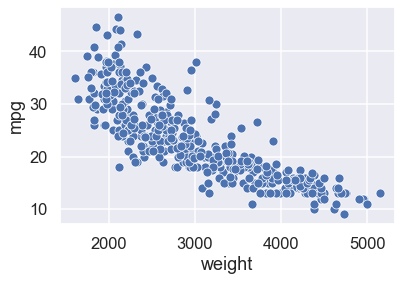

In [116]:
sns.set_theme('talk')
sns.scatterplot(x='weight',y='mpg',data=cars)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

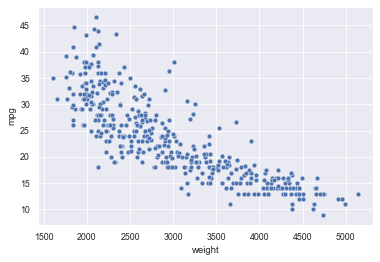

In [117]:
sns.set_theme('paper')
sns.scatterplot(x='weight',y='mpg',data=cars)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

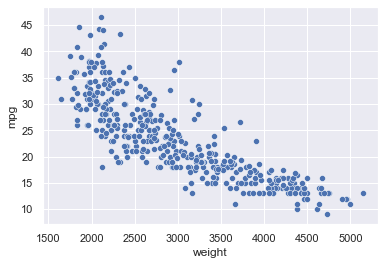

In [118]:
sns.set_theme('notebook')
sns.scatterplot(x='weight',y='mpg',data=cars)

### Using `seaborn` plotting functions
<img src=https://seaborn.pydata.org/_images/function_overview_8_0.png style="height:300px">

- `relplot()` makes plots that show the relationship between numerical variables like `scatterplot()` and `lineplot()`
- `displot()` makes plots that visualize the distributions of variables like histograms
- `catplot()` makes plots where one or more variables are categorical variables like `barplot()`

### Common input arguments of seaborn plotting functions
- `data`: pandas dataframe containing data to be plotted
- `x`: variable in `data` that contains x-axis values
- `y`: variable in `data` that contains y-axis values
- `hue`: categorical variable in `data` that changes the color of datapoints
- `size`: variable in `data` that will change point size
- `col`: variable to map columns of a subplot grid to
- `row`: variable to map rows of a subplot grid to
- `col_wrap`: if only `col` is specified, `col_wrap` controls how many plots per row

### Relative Plots

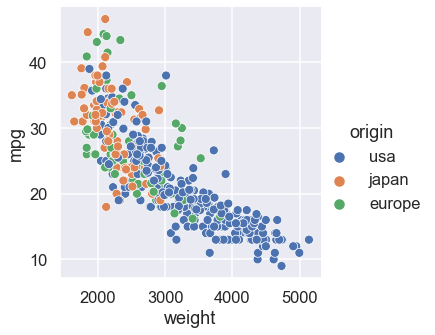

In [119]:
sns.set_theme('talk')

# make a scatter plot but color data points by the origin of the car
sns.relplot(x='weight',y='mpg',hue='origin',data=cars,kind='scatter')

<AxesSubplot:xlabel='weight', ylabel='mpg'>

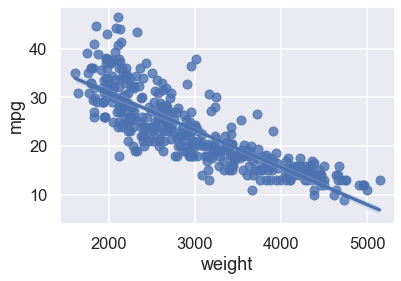

In [120]:
# make a scatter plot with a trendline
sns.regplot(x='weight',y='mpg',data=cars)

### Distribution plots

<AxesSubplot:xlabel='weight', ylabel='Count'>

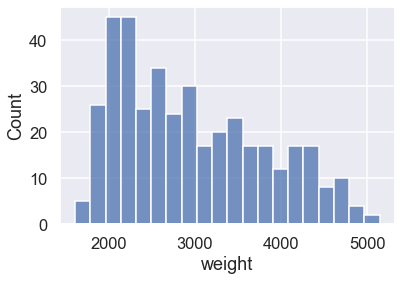

In [121]:
sns.set_theme('talk')

# plot a histogram of car weights
sns.histplot(x='weight',data=cars, bins = 20)

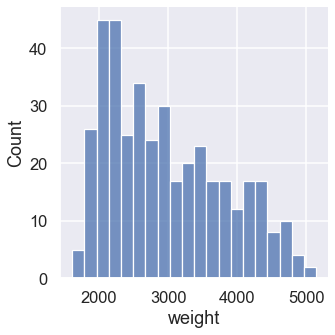

In [122]:
# plot a histogram of car weights using displot()
sns.displot(x='weight',data=cars, kind='hist', bins = 20)

<AxesSubplot:xlabel='weight', ylabel='Density'>

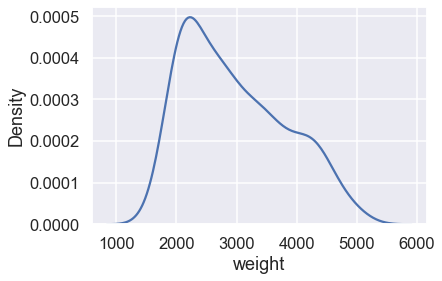

In [123]:
# make a density plot of car weight
sns.kdeplot(x='weight',data=cars)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

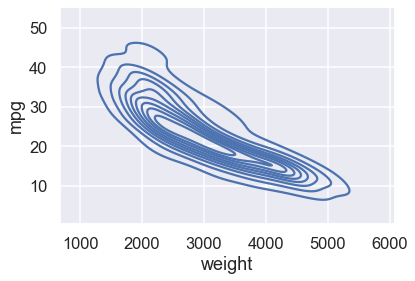

In [124]:
sns.kdeplot(x='weight',y='mpg',data=cars)

### `jointplot()` combines `relplot()` and `displot()`

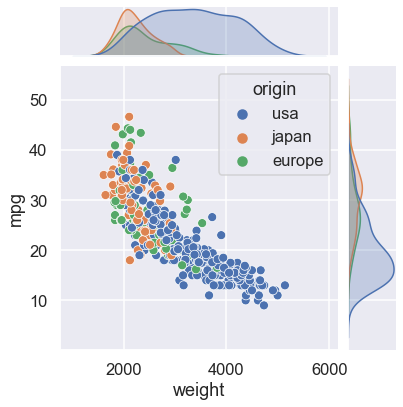

In [125]:
# jointplot() combines a scatter plot with distribution plots of the x and y variable
sns.jointplot(x='weight',y='mpg',hue='origin',data=cars)

### Categorical Plots

<AxesSubplot:xlabel='origin', ylabel='mpg'>

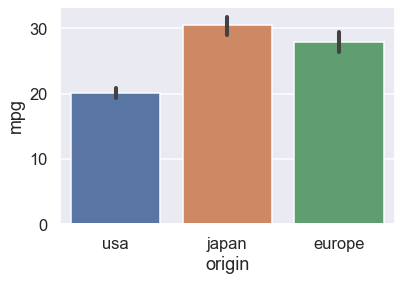

In [126]:
sns.set_theme('talk')
# plot a bar graph of average mpg by origin
sns.barplot(x='origin',y='mpg',data=cars)

C:\Users\rehman\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='origin', ylabel='mpg'>

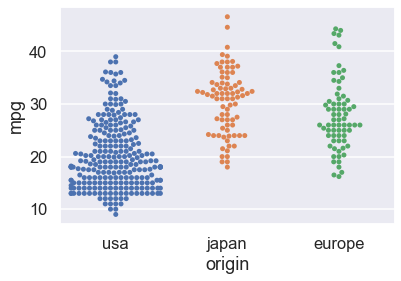

In [127]:
# same thing but a swarm plot
sns.swarmplot(x='origin',y='mpg',data=cars)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

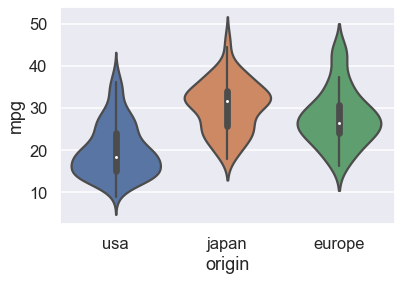

In [128]:
# violin plot
sns.violinplot(x='origin',y='mpg',data=cars)

In [ ]:
# You can also use catplot
sns.catplot(x='origin',y='mpg',kind='violin',data=cars)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

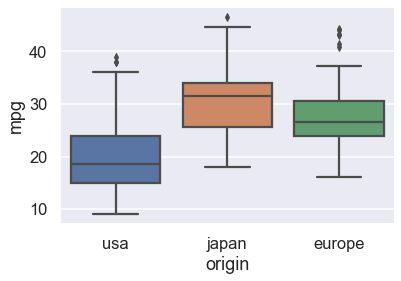

In [129]:
# box plot
sns.boxplot(x='origin',y='mpg',data=cars)

### Showing multiple variables with colors and grids

<AxesSubplot:xlabel='mpg', ylabel='Count'>

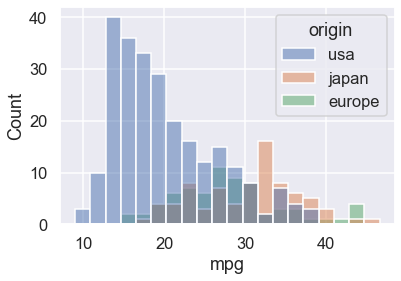

In [130]:
sns.histplot(x='mpg',hue='origin',bins=20,data=cars)

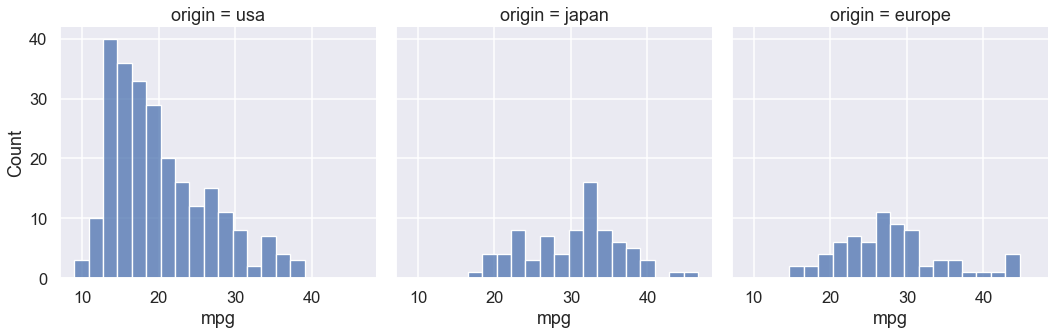

In [131]:
# now plot with a grid
sns.displot(x='mpg',col='origin',kind='hist',bins=20,data=cars)

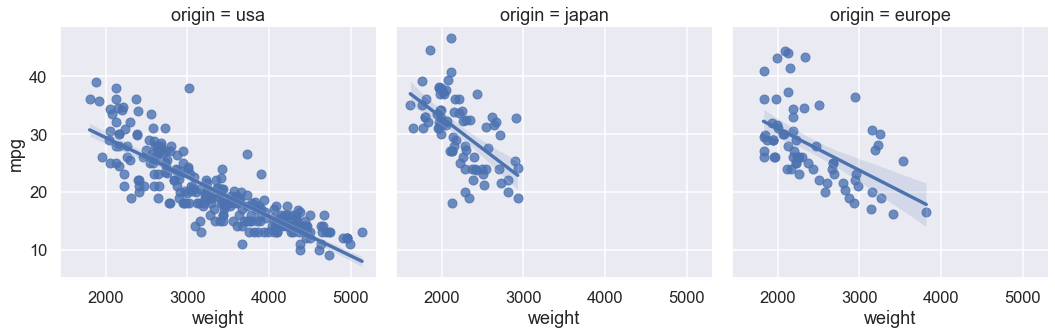

In [132]:
# lmplot is a scatterplot that
sns.lmplot(x='weight',y='mpg',col='origin',data=cars)

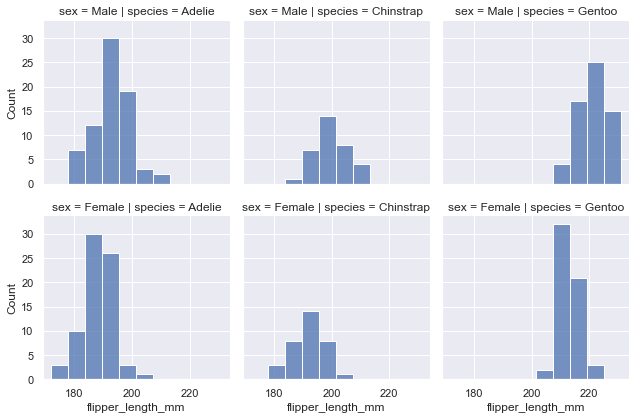

In [133]:
penguins = pd.read_csv('penguins.csv')
sns.set_theme('notebook')

# make a grid based on 2 variables
sns.displot(x='flipper_length_mm',row='sex',col='species',data=penguins,kind='hist', height=3)

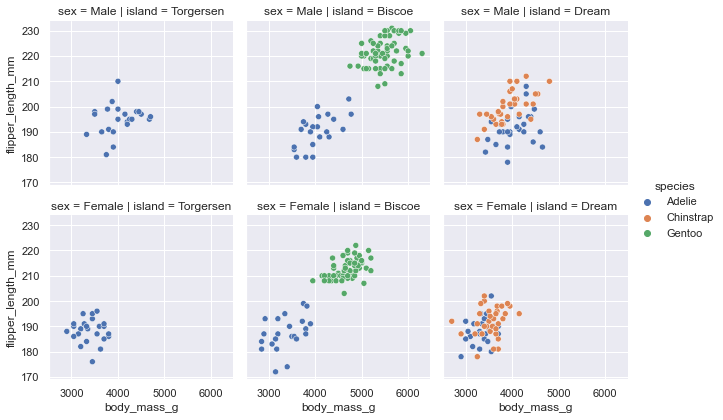

In [134]:
sns.set_theme('notebook')

# with one function call we can make an extremely complex plot that conveys a lot of information
sns.relplot(
    x='body_mass_g',
    y='flipper_length_mm',
    hue='species',
    row='sex',
    col='island',
    kind='scatter',
    data=penguins,
    height=3
)

### Python data analysis
- `numpy`, `scipy`, `matplotlib`, `pandas` and `seaborn` are capable of so much more than what we have covered.
- You can change many aspects of a plot with `matplotlib`, pandas plotting, and `seaborn`, but we haven't covered the fine details of formatting plots
- In the future, for your plotting needs, I recommend that you use `seaborn` as much as possible, though you may need to dip into `matplotlib` sometimes
- If you get comfortable with these 5 packages and general python then you can do anything.
    - You'll never have to use Excel again except to save your DataFrame as an xlsx file to share with people
- There are python modules for image and video processing, machine learning, and more.

### Principles of Data Analysis
- Raw Data is immutable
    - Always keep the original file unaltered, you can make a copy if you need to make changes
- Prefer to do as much of the data analysis as possible with code instead of doing it manually
    - If you make a mistake in your code you will be able to track it down, but if you do things manually or in Excel, you won't be able to track down the mistake.
    - You also might have to start over if you make a mistake in Excel
- Keep your data files and code as organized as possible
    - learn git to track changes in your code
    - version control
- Explore your data by plotting it in jupyterlab or spyder to get a sense of what it looks like
- In your courses in the future, try to do your data analysis in python so you can keep practicing

# This is just the beginning of your programming journey


<img src=https://i.redd.it/xoqw3zhim0x21.png style="height:300px">

- Keep practicing your python programming
    - Most of what you learn will be outside a classroom